In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

In [47]:
# 1.9
def energy(grid,J):
    up = grid*np.roll(grid,1,0)
    down = grid*np.roll(grid,-1,0)
    left = grid*np.roll(grid,1,1)
    right = grid*np.roll(grid,-1,1)
    E_grid = up+down+left+right
    E = -1/2*J*np.sum(E_grid)
    return E

def delta_site_energy(current_grid, i, j, J):
    N = np.shape(current_grid)[0]
    delta_E = -2*current_grid[i,j]*(current_grid[(i+1)%N,j]+current_grid[(i-1)%N,j]+current_grid[i,(j+1)%N]+current_grid[i,(j-1)%N])
    delta_E *= -J
    return delta_E
    

def spinflip(grid):
    i,j = random.randint(0,np.shape(grid)[0],2)
    flip_grid = np.copy(grid)
    flip_grid[i,j] *= -1
    return [i,j,flip_grid]

def exp_factor(delta_E,T):
    x = np.exp(-delta_E/T)
    return x

def select(delta_E,T):
    if delta_E<0:
        return 1
    else:
        random_number = random.rand()
        exp_number = exp_factor(delta_E,T)
        if random_number < exp_number:
            return 1
        else: 
            return 0



In [104]:
def one_run(N_site = 20, T=1,n_max=10**4,n_0=0,J=1):
    grid = random.randint(0,2,size=[N_site,N_site])
    grid = 2*grid-1
    current_energy = energy(grid,J)
    E = [current_energy]
    s = [np.sum(grid)]
    for l in range(int(n_max)):
        prev_energy = current_energy
        i,j,new_grid = spinflip(grid)
        delta_E = delta_site_energy(grid,i,j,J)
        selection = select(delta_E,T)
        if selection==1:
            grid=new_grid
            current_energy = prev_energy+delta_E
        else:
            current_energy = prev_energy
        E.append(current_energy)
        s.append(np.sum(grid))
    
    return [E,s,grid]

T=2.5
n_max=5*10**5
n_0 = int(n_max/4)
N_site=20
J=1



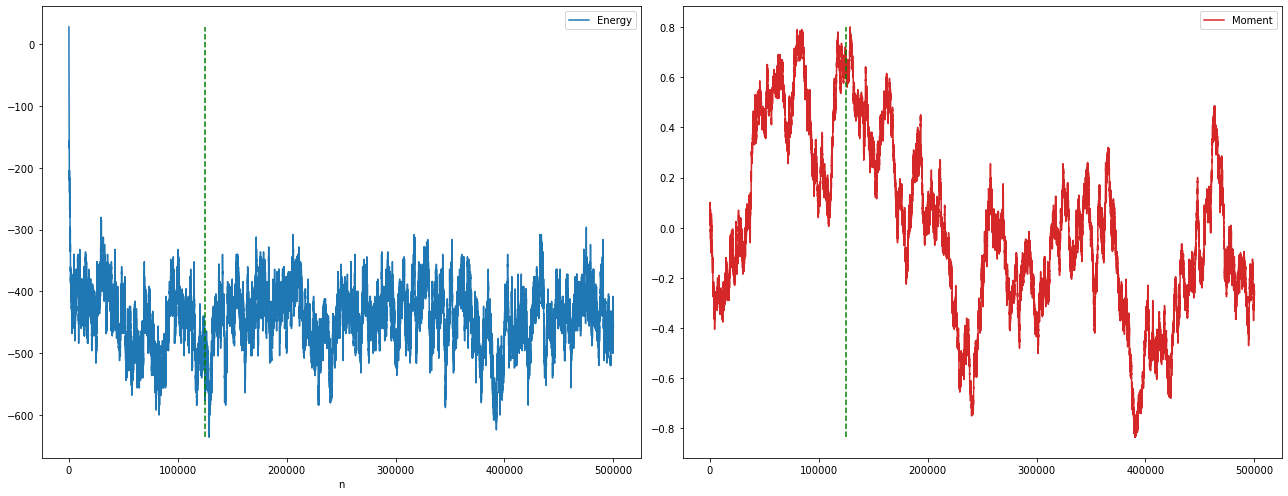

-442.1501702662126
0.08561979834720441


In [105]:
E,s,final_grid = one_run(N_site=N_site,T=T,J=J,n_max=n_max)
E,s = np.array(E),np.array(s)/(N_site**2)

fig,ax = plt.subplots(1,2,figsize=(18,7))
x = np.arange(len(E))
ax[0].plot(x,E,label= "Energy")
ax[1].plot(x,s,label="Moment",color="tab:red")
ax[0].set_xlabel("n")
ax[0].set_xlabel("n")
y_E = np.linspace(min(E),max(E),2)
y_s = np.linspace(min(s),max(s),2)
ax[0].plot([n_0,n_0],y_E,linestyle="dashed",color="green")
ax[1].plot([n_0,n_0],y_s,linestyle="dashed",color="green")



ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()
print(np.mean(E[n_0::]))
print(abs(np.mean(s[n_0::])))

In [ ]:
def one_run(N_site = 20, T=1,n_max=10**4,n_0=0,J=1):
    grid = random.randint(0,2,size=[N_site,N_site])
    grid = 2*grid-1
    current_energy = energy(grid,J)
    E = [current_energy]
    s = [np.sum(grid)]
    for l in range(int(n_max)):
        prev_energy = current_energy
        i,j,new_grid = spinflip(grid)
    #    delta_E = delta_site_energy(grid,i,j,J)
        delta_E = energy(new_grid,J)-energy(grid,J)
        selection = select(delta_E,T)
        if selection==1:
            grid=new_grid
            current_energy = prev_energy+delta_E
        else:
            current_energy = prev_energy
        E.append(current_energy)
        s.append(np.sum(grid))
    
    return [E,s,grid]

T=2.2
n_max=100
n_0 = int(n_max/4)
N_site=100
J=1

E,s = one_run(N_site=N_site,T=T,J=J,n_max=n_max)[:2]

[[-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]
[[-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]
0.0 1.0
4.0 0.16232061118184818
[[-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]
[[-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]
0.0 1.0
[[-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]
[[-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]
0.0 1.0
8.0 0.0263479808

In [9]:
i,j = 1,3
J=-1
test_grid = np.ones((5,5))
test_grid[i,j]=-1
test_grid[0,3]*=-1
print(energy(test_grid,J))
new_grid = np.copy(test_grid)
new_grid[i,j]*=-1
print(energy(new_grid,J))
print(test_grid,new_grid)


print(delta_site_energy(test_grid,i,j,-1))

38.0
42.0
[[ 1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]] [[ 1.  1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
4.0
